## Farmer's Problem

#### Student: Rodolfo Lerma

A farmer owns `60 acres` of land. She can plant either wheat or corn.  Based on current predictions, **wheat** will yield a profit of `$200` per acre while **corn** yields a profit of `$300` per acre. 

Each planted acre uses fertilizer and labor, **wheat** using  `2 tons` of fertilizer and `3 hours` of worker time; **corn** using `4 tons` of fertilizer and `2 hours` of worker time.

There are `120 tons` of fertilizer and `100 hours` of worker time available (costs of which are already included in the profit calculation).

How should the farmer divide her land?

### First Example: Wheat & Corn only (Class follow along)

In [1]:
# Import Libraries
from docplex.mp.model import Model
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Get an instance of the Model
mdl = Model()

In [3]:
# Define the Variables
x = mdl.continuous_var(name="wheat")
y = mdl.continuous_var(name="corn")

In [4]:
# Define Constraints 

# Labor Constraint - Hrs
mdl.add_constraint(3*x + 2*y <= 100)

# Fertilizer - Tons
mdl.add_constraint(2*x + 4*y <= 120)

# Size of Land - Acres
mdl.add_constraint(x + y <= 60)

# No Negativity Constraint
mdl.add_constraint(x >= 0)
mdl.add_constraint(y >= 0)

docplex.mp.LinearConstraint[](corn,GE,0)

In [5]:
# Objective Function: Maximize
mdl.maximize(200*x + 300*y)

In [6]:
# Solver
mdl.solve()

docplex.mp.solution.SolveSolution(obj=10000,values={wheat:20,corn:20})

In [7]:
# Print Solver Details
mdl.get_solve_details()

docplex.mp.SolveDetails(time=0.016,status='optimal')

In [8]:
# Print Solution
mdl.print_solution()

objective: 10000.000
status: OPTIMAL_SOLUTION(2)
  wheat=20.000
  corn=20.000


In [9]:
# Print Information
mdl.print_information()

Model: docplex_model1
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 5
   - linear=5
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


In [10]:
objective_value = mdl.objective_value

### Second Example:  Wheat, Corn & Potatoes (Offline section)

Recall the farmer's problem that we discussed in the first live session. We will extend the possible crops for the farmer with another option: potatoes. One acre of **potatoes** needs `3 tons` of fertilizer and `3 hours` of worker time. The profit is `$275` per acre.

In [11]:
# Get an instance of the Model
mdl2 = Model()

In [12]:
# Define the Variables
x = mdl2.continuous_var(name="wheat")
y = mdl2.continuous_var(name="corn")
z = mdl2.continuous_var(name="potato")

In [13]:
# Define Constraints 

# Labor Constraint - Hrs
mdl2.add_constraint(3*x + 2*y + 3*z <= 100)

# Fertilizer - Tons
mdl2.add_constraint(2*x + 4*y + 3*z <= 120)

# Size of Land - Acres
mdl2.add_constraint(x + y + z <= 60)

# No Negativity Constraint
mdl2.add_constraint(x >= 0)
mdl2.add_constraint(y >= 0)

docplex.mp.LinearConstraint[](corn,GE,0)

In [14]:
# Objective Function: Maximize
mdl2.maximize(200*x + 300*y + 275*z)

#### Results

In [15]:
# Solver
mdl2.solve()

docplex.mp.solution.SolveSolution(obj=10333.3,values={corn:10,potato:26...

In [16]:
# Print Solver Details
mdl2.get_solve_details()

docplex.mp.SolveDetails(time=0,status='optimal')

In [17]:
# Print Solution
mdl2.print_solution()

objective: 10333.333
status: OPTIMAL_SOLUTION(2)
  corn=10.000
  potato=26.667


In [18]:
# Print Information
mdl2.print_information()

Model: docplex_model2
 - number of variables: 3
   - binary=0, integer=0, continuous=3
 - number of constraints: 5
   - linear=5
 - parameters: defaults
 - objective: maximize
 - problem type is: LP


In [19]:
objective_value2 = mdl2.objective_value

### Comparing both Problems (Class and Offline) and Optmization Results

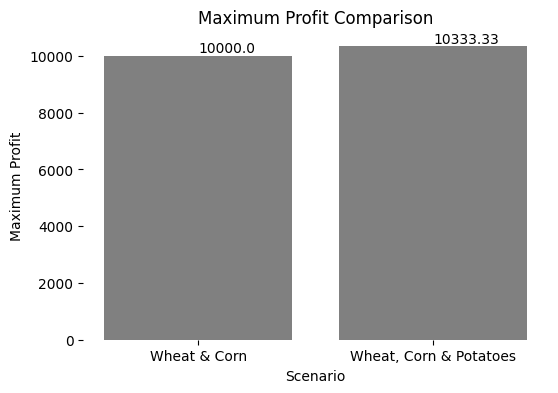

In [20]:
# Data
scenarios = ["Wheat & Corn", "Wheat, Corn & Potatoes"]
profits = [objective_value, objective_value2]

# Create a smaller bar plot
fig, ax = plt.subplots(figsize=(6, 4))

# Create the bar plot
bars = ax.bar(scenarios, profits, color='gray', edgecolor='none')  # edgecolor='none' to remove the black line

# Add the data value on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# Setting plot title and labels
ax.set_title("Maximum Profit Comparison")
ax.set_xlabel("Scenario")
ax.set_ylabel("Maximum Profit")

# Remove the box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

### Third Example: Online Quiz

This question refers to Problem 1 of the offline part.

Suppose we have 50 more hours of worker time available (so the total worker time is 150 hours). Modify your model and resolve it optimality.

Note: Your notebook, and DOCplex model, remembers all previously committed statements. If you re-run a cell that adds a constraint to the model, the old constraint is still present as well.  Therefore, to change a constraint, it is probably easiest to restart the kernel and re-run all statements/cells from scratch.

What the is profit of the new optimal solution?  Specify a numeric value (with at least two decimals in case of a fractional solution).


In [21]:
# Get an instance of the Model
mdl3 = Model()

In [22]:
# Define the Variables
x = mdl3.continuous_var(name="wheat")
y = mdl3.continuous_var(name="corn")
z = mdl3.continuous_var(name="potato")

In [23]:
# Define Constraints 

# Labor Constraint - Hrs
mdl3.add_constraint(3*x + 2*y + 3*z <= 150) #Main Change compared to previous problem

# Fertilizer - Tons
mdl3.add_constraint(2*x + 4*y + 3*z <= 120)

# Size of Land - Acres
mdl3.add_constraint(x + y + z <= 60)

# No Negativity Constraint
mdl3.add_constraint(x >= 0)
mdl3.add_constraint(y >= 0)

docplex.mp.LinearConstraint[](corn,GE,0)

In [24]:
# Objective Function: Maximize
mdl3.maximize(200*x + 300*y + 275*z)

In [25]:
# Solver
mdl3.solve()

docplex.mp.solution.SolveSolution(obj=11500,values={wheat:30,potato:20})

In [26]:
# Print Solution
mdl3.print_solution()

objective: 11500.000
status: OPTIMAL_SOLUTION(2)
  wheat=30.000
  potato=20.000


In [27]:
objective_value3 = mdl3.objective_value

### Comparing the 3 Problems (Class, Offline & Online) and Optmization Results

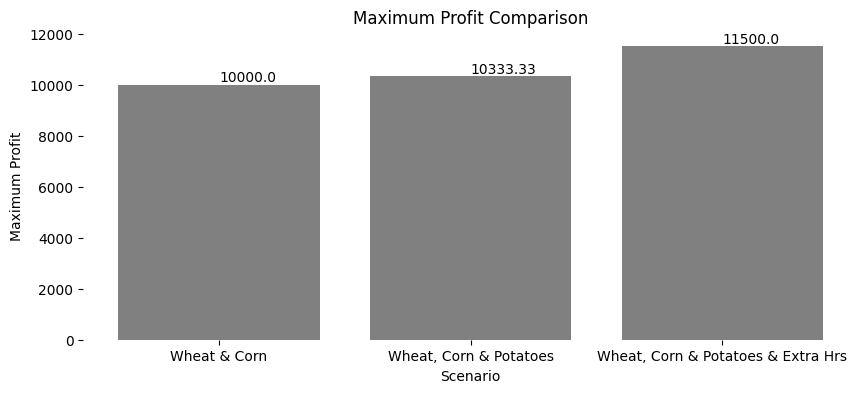

In [28]:
# Data
scenarios = ["Wheat & Corn", "Wheat, Corn & Potatoes", "Wheat, Corn & Potatoes & Extra Hrs"]
profits = [objective_value, objective_value2, objective_value3]

# Create a smaller bar plot
fig, ax = plt.subplots(figsize=(10, 4))

# Create the bar plot
bars = ax.bar(scenarios, profits, color='gray', edgecolor='none')  # edgecolor='none' to remove the black line

# Add the data value on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# Setting plot title and labels
ax.set_title("Maximum Profit Comparison")
ax.set_xlabel("Scenario")
ax.set_ylabel("Maximum Profit")

# Remove the box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()